# 三层全连接网络的Pytorch实现

https://pytorch.org/

In [28]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [27]:
torch.__version__

'1.7.0'

## 导入数据 
ETL: **extract-transform-load**

In [4]:
# 定义全局变量
n_epochs = 10     # epoch 的数目
batch_size = 20   # 决定每次读取多少图片

# 定义训练集个测试集，如果找不到数据，就下载
train_data = datasets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
test_data = datasets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
# 创建加载器
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = len(test_data), num_workers = 0)

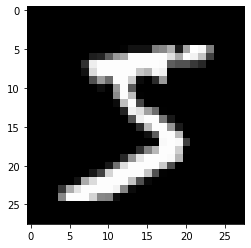

In [17]:
plt.imshow(train_data.train_data[0],cmap='gray')

In [30]:
len(train_data)

60000

In [31]:
len(train_loader)

3000

## 定义模型、损失函数（准则）和优化器

In [33]:
# model
model = nn.Sequential(nn.Linear(784,512),nn.Linear(512,10))
# loss
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [34]:
model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Linear(in_features=512, out_features=10, bias=True)
)

In [35]:
# optimizer.param_groups

## 训练

In [36]:
# train
losses = []
for batch_idx, (X_batch, y_batch) in tqdm(enumerate(train_loader)):
    X_batch = X_batch.flatten(start_dim=1)
    # Zero gradient buffers
    optimizer.zero_grad()

    # Pass data through the network
    y_hat = model(X_batch)

    # Calculate loss
    loss = criterion(y_hat, y_batch)

    # Backpropagate
    loss.backward()

    # Update weights
    optimizer.step()

    if batch_idx%20==0:
        losses.append(loss.data.item())

3000it [00:07, 393.52it/s]


## 结果分析

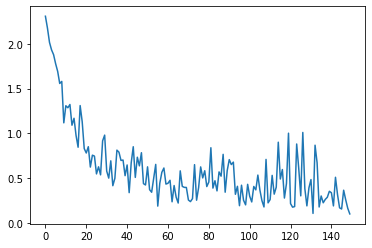

In [37]:
#%% 训练误差
plt.plot(losses);plt.show()

/Applications/anaconda3/envs/dlenv/lib/python3.7/site-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Applications/anaconda3/envs/dlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


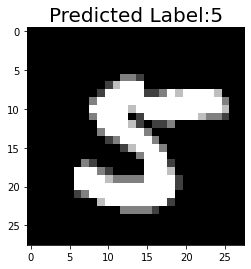

In [38]:
#%% 预测
model.eval()
idx_test = 1245
image_test = test_data.test_data[idx_test]
image_test_flatten = torch.tensor(image_test.reshape(1,-1),dtype=torch.float)
label_test = test_data.test_data[idx_test]

y_predict = model(image_test_flatten)
label_predict = torch.argmax(y_predict).item()

plt.imshow(image_test,cmap='gray')
plt.title(f'Predicted Label:{label_predict}',fontsize=20)
plt.show()

In [39]:
#%% 准确度
for data, target in test_loader:
    data = data.flatten(start_dim=1)
    output = model(data)
    pred = torch.argmax(output,dim=1)
    correct = pred.eq(target)
    accuracy = np.mean([1 if c else 0 for c in correct])
print(f'Accuracy:{accuracy*100:.2f}%')

Accuracy:89.50%
